Importing Libraries

In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [99]:
#Load the data 
df = pd.read_csv("/kaggle/input/airline-delays/airline_delay.csv")

#set display option
pd.set_option('display.max_columns',None)
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,0.12,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,0.04,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,1.60,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,1.83,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,5.22,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,3.99,0.0,0.80,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0
3347,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,4.13,0.0,5.12,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0
3348,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,0.52,0.0,0.00,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0
3349,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0


Data Cleaning and Manibulation

In [100]:
#Check for null values
null_values = df.isnull().any(axis=1) #checking to see how relevant the missing values are to know how to deal with them 
df[null_values]


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
341,2020,12,DL,Delta Air Lines Inc.,BIL,"Billings, MT: Billings Logan International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2020,12,DL,Delta Air Lines Inc.,CHA,"Chattanooga, TN: Lovell Field",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,2020,12,DL,Delta Air Lines Inc.,FAI,"Fairbanks, AK: Fairbanks International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,2020,12,OO,SkyWest Airlines Inc.,BDL,"Hartford, CT: Bradley International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1147,2020,12,OO,SkyWest Airlines Inc.,PWM,"Portland, ME: Portland International Jetport",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,2020,12,UA,United Air Lines Inc.,PNS,"Pensacola, FL: Pensacola International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,2020,12,UA,United Air Lines Inc.,STL,"St. Louis, MO: St Louis Lambert International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#So it appears that most of the missing values are duplicates so we drop all missing values 
df.dropna(inplace=True)

In [102]:
#Check for duplicates
df.duplicated().sum()

0

Exploratory Data Analysis

In [103]:
#check the first 10 rows of the dataframe
df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,0.12,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,0.04,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,1.60,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,1.83,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,5.22,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0
5,2020,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5985.0,445.0,142.89,11.96,161.37,1.0,127.79,5.0,0.0,30756.0,16390.0,1509.0,5060.0,16.0,7781.0
6,2020,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",142.0,14.0,5.36,0.00,7.70,0.0,0.94,1.0,0.0,436.0,162.0,0.0,182.0,0.0,92.0
7,2020,12,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",147.0,10.0,6.04,1.00,1.00,0.0,1.96,0.0,1.0,1070.0,838.0,141.0,24.0,0.0,67.0
8,2020,12,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",84.0,14.0,6.24,0.96,6.80,0.0,0.00,1.0,1.0,2006.0,1164.0,619.0,223.0,0.0,0.0
9,2020,12,9E,Endeavor Air Inc.,BDL,"Hartford, CT: Bradley International",150.0,19.0,5.70,0.00,12.07,0.0,1.23,3.0,0.0,846.0,423.0,0.0,389.0,0.0,34.0


In [104]:
#check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3343 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3343 non-null   int64  
 1   month                3343 non-null   int64  
 2   carrier              3343 non-null   object 
 3   carrier_name         3343 non-null   object 
 4   airport              3343 non-null   object 
 5   airport_name         3343 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   float6

In [105]:
#check the summary statistics of the dataframe 
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3343.000000,3343.0,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,2019.458271,12.0,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,0.498330,0.0,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,2019.000000,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2019.000000,12.0,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,2019.000000,12.0,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,2020.000000,12.0,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,2020.000000,12.0,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


Data Analysis 

In [106]:
#General Summary Statistics 
# Total number of flights for each carrier in December 2019 and 2020
flight_count = df.groupby(['carrier_name','year'])['arr_flights'].sum().reset_index()
flight_count

,carrier_name,year,arr_flights
0,Alaska Airlines Inc.,2019,21993.0
1,Alaska Airlines Inc.,2020,11008.0
2,Allegiant Air,2019,9381.0
3,Allegiant Air,2020,7368.0
4,American Airlines Inc.,2019,79405.0
5,American Airlines Inc.,2020,38496.0
6,Delta Air Lines Inc.,2019,81524.0
7,Delta Air Lines Inc.,2020,49378.0
8,Endeavor Air Inc.,2019,23365.0
9,Endeavor Air Inc.,2020,22010.0


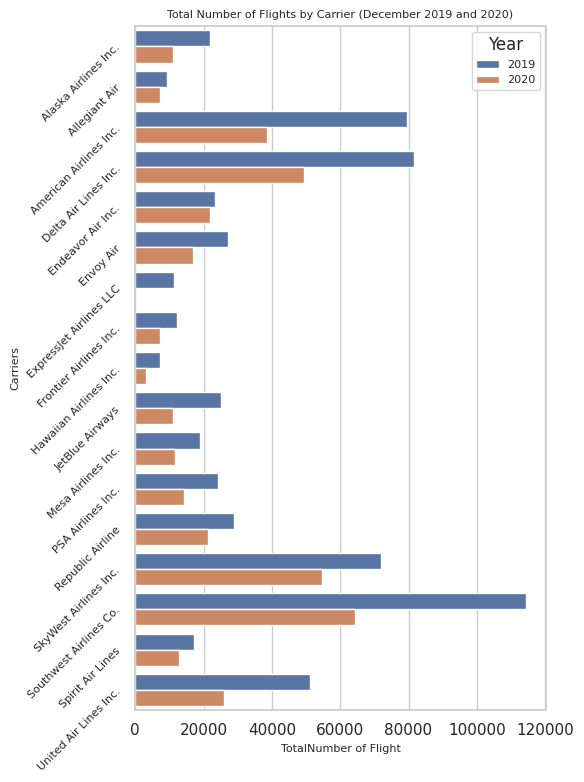

In [107]:
#Visualization
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

#Create a bar plot 
plt.figure(figsize=(6,8))

sns.barplot(y='carrier_name', x='arr_flights', hue='year',data=flight_count, orient='h')

#Customize the plot 
plt.ylabel('Carriers',fontsize=8)
plt.xlabel('TotalNumber of Flight',fontsize=8)
plt.title("Total Number of Flights by Carrier (December 2019 and 2020)",fontsize=8)
plt.yticks(rotation=45,fontsize=8)

# Display the plot
plt.legend(title="Year", loc="upper right",fontsize=8)
plt.tight_layout()  
plt.show()

In [108]:
#Delay Analysis
# Carrier with the highest number of flights delayed more than 15 minutes
flight_delay = df.groupby(['carrier_name','year'])['arr_del15'].sum().reset_index()
flight_delay

,carrier_name,year,arr_del15
0,Alaska Airlines Inc.,2019,5469.0
1,Alaska Airlines Inc.,2020,825.0
2,Allegiant Air,2019,2395.0
3,Allegiant Air,2020,1085.0
4,American Airlines Inc.,2019,14617.0
5,American Airlines Inc.,2020,4327.0
6,Delta Air Lines Inc.,2019,12444.0
7,Delta Air Lines Inc.,2020,6419.0
8,Endeavor Air Inc.,2019,3965.0
9,Endeavor Air Inc.,2020,1895.0


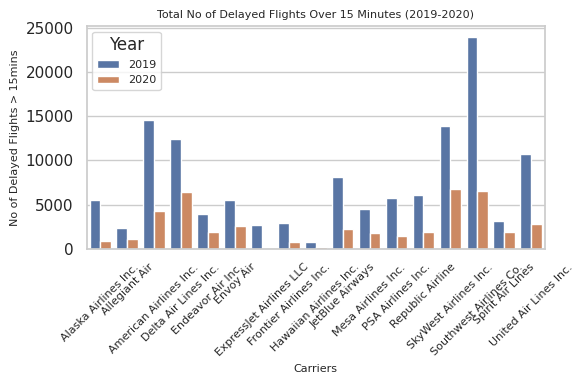

In [109]:
#Visualization
# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='carrier_name', y='arr_del15', data=flight_delay, hue='year')

# Customize the plot
plt.xlabel('Carriers',fontsize=8)
plt.ylabel('No of Delayed Flights > 15mins', fontsize=8)
plt.title('Total No of Delayed Flights Over 15 Minutes (2019-2020)',fontsize=8)
plt.xticks(rotation=45, fontsize=8) 

# Display the plot
plt.legend(title="Year", loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()

In [110]:
#Cancellation Analysis
# Carriers with the most canceled flights in December 2019 and 2020
cancelled_flights = df.groupby(['carrier_name','year'])['arr_cancelled'].sum().reset_index()
cancelled_flights

,carrier_name,year,arr_cancelled
0,Alaska Airlines Inc.,2019,241.0
1,Alaska Airlines Inc.,2020,164.0
2,Allegiant Air,2019,70.0
3,Allegiant Air,2020,152.0
4,American Airlines Inc.,2019,177.0
5,American Airlines Inc.,2020,210.0
6,Delta Air Lines Inc.,2019,26.0
7,Delta Air Lines Inc.,2020,566.0
8,Endeavor Air Inc.,2019,246.0
9,Endeavor Air Inc.,2020,166.0


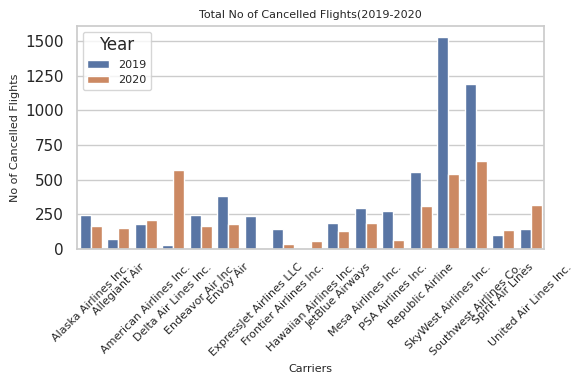

In [111]:
#Visualization
#Create bar plot 
plt.figure(figsize=(6,4))
sns.barplot(x='carrier_name', y='arr_cancelled', data=cancelled_flights, hue='year')

#Customize bar plot 
plt.xlabel('Carriers',fontsize=8)
plt.ylabel('No of Cancelled Flights',fontsize=8)
plt.title('Total No of Cancelled Flights(2019-2020',fontsize=8)
plt.xticks(rotation=45, fontsize=8) 

# Display the plot
plt.legend(title="Year", loc="upper left",fontsize=8)
plt.tight_layout()
plt.show()          
          

In [112]:
#Diversions
#Airports with the most flight diversions and the carriers involved
diverted_flights = df.groupby(['carrier_name','year'])['arr_diverted'].sum().reset_index()
diverted_flights

,carrier_name,year,arr_diverted
0,Alaska Airlines Inc.,2019,51.0
1,Alaska Airlines Inc.,2020,39.0
2,Allegiant Air,2019,15.0
3,Allegiant Air,2020,20.0
4,American Airlines Inc.,2019,134.0
5,American Airlines Inc.,2020,55.0
6,Delta Air Lines Inc.,2019,93.0
7,Delta Air Lines Inc.,2020,49.0
8,Endeavor Air Inc.,2019,57.0
9,Endeavor Air Inc.,2020,26.0


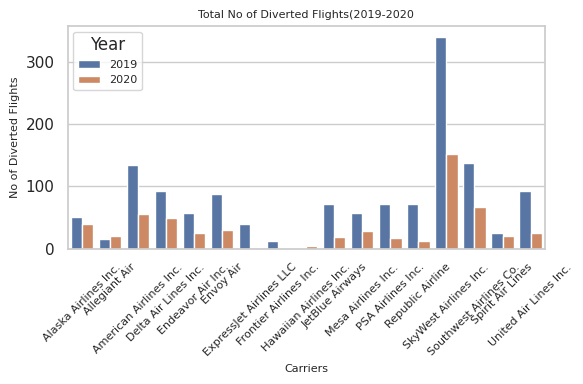

In [113]:
#Visualization
#Create bar plot 
plt.figure(figsize=(6,4))
sns.barplot(x='carrier_name', y='arr_diverted', data=diverted_flights, hue='year')

#Customize bar plot 
plt.xlabel('Carriers',fontsize=8)
plt.ylabel('No of Diverted Flights',fontsize=8)
plt.title('Total No of Diverted Flights(2019-2020',fontsize=8)
plt.xticks(rotation=45, fontsize=8) 

# Display the plot
plt.legend(title="Year", loc="upper left",fontsize=8)
plt.tight_layout()
plt.show()          
          

In [114]:
#Detailed Delay Types
#Carriers with the highest delays due to different categories
delay_categories = df.groupby(['carrier_name', 'year'])[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()
delay_categories

carrier_delay  weather_delay  nas_delay  \
carrier_name            year                                            
Alaska Airlines Inc.    2019        87950.0         3785.0    96684.0   
                        2020        12576.0         3871.0    10996.0   
Allegiant Air           2019        51789.0        12268.0    27541.0   
                        2020        27609.0         3952.0    21019.0   
American Airlines Inc.  2019       321322.0        23198.0   203348.0   
                        2020       127147.0        16071.0    68509.0   
Delta Air Lines Inc.    2019       257675.0        43330.0   217742.0   
                        2020       166322.0        18908.0   101411.0   
Endeavor Air Inc.       2019        81530.0        22658.0    73966.0   
                        2020        61305.0        10256.0    24968.0   
Envoy Air               2019        79169.0        39127.0    74871.0   
                        2020        32513.0        14060.0    50354.0   
ExpressJet Airlines LLC 2019        79871.0         8325.0    87490.0   
Frontier Airlines Inc.  2019        57460.0         1633.0    44321.0   
                        2020        13118.0         1111.0    15496.0   
Hawaiian Airlines Inc.  2019        20721.0          452.0      369.0   
                        2020         8282.0         1504.0       43.0   
JetBlue Airways         2019       238720.0        12637.0   158828.0   
                        2020        58719.0         7658.0    33958.0   
Mesa Airlines Inc.      2019       142485.0        16910.0    30524.0   
                        2020        41934.0         7677.0    36740.0   
PSA Airlines Inc.       2019       101718.0        12629.0    58039.0   
                        2020        36183.0         5459.0    15421.0   
Republic Airline        2019        78608.0        15920.0   150751.0   
                        2020        51931.0         7736.0    26857.0   
SkyWest Airlines Inc.   2019       473345.0       127948.0   185341.0   
                        2020       315598.0        91654.0    34402.0   
Southwest Airlines Co.  2019       401750.0        11873.0   167596.0   
                        2020       104518.0         3202.0    56764.0   
Spirit Air Lines        2019        49635.0         9233.0    88978.0   
                        2020        23750.0         3652.0    47981.0   
United Air Lines Inc.   2019       161066.0        27418.0   255759.0   
                        2020        60624.0         7573.0    38777.0   

                              security_delay  late_aircraft_delay  
carrier_name            year                                       
Alaska Airlines Inc.    2019           896.0             124338.0  
                        2020           891.0               9048.0  
Allegiant Air           2019           804.0              67931.0  
                        2020            79.0              27722.0  
American Airlines Inc.  2019          1361.0             357265.0  
                        2020           560.0              66564.0  
Delta Air Lines Inc.    2019           436.0             215545.0  
                        2020           714.0              55346.0  
Endeavor Air Inc.       2019           150.0             126776.0  
                        2020            98.0              29976.0  
Envoy Air               2019           286.0             175206.0  
                        2020           360.0              39219.0  
ExpressJet Airlines LLC 2019             0.0              78462.0  
Frontier Airlines Inc.  2019             0.0              89957.0  
                        2020             0.0               9600.0  
Hawaiian Airlines Inc.  2019           159.0               6678.0  
                        2020             0.0               1035.0  
JetBlue Airways         2019           456.0             312657.0  
                        2020           391.0              40766.0  
Mesa Airlines Inc.      2019           348.0  

/tmp/ipykernel_32/660284332.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x='carrier_name', y='total_delay', hue='delay_category', data=delay_categories, ci=None)


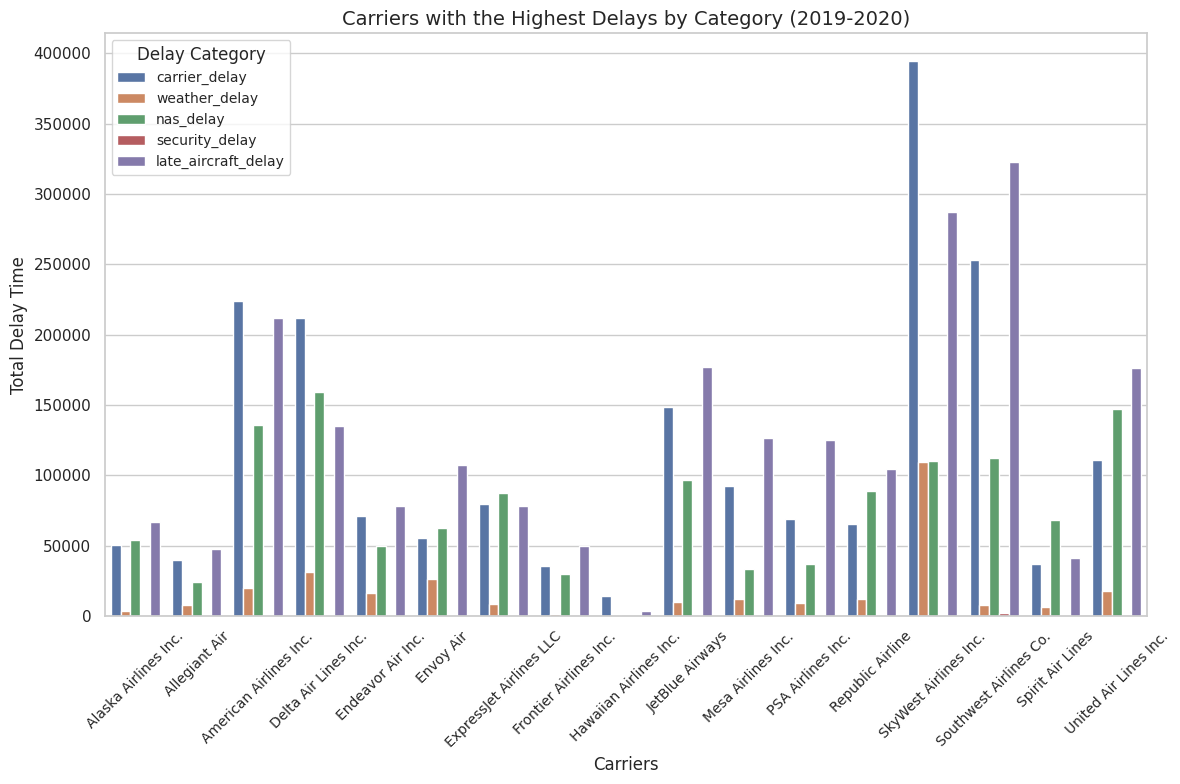

In [115]:
#Visualization
# Create a bar plot
plt.figure(figsize=(12, 8))

# Reset the index to make 'carrier_name' and 'year' columns accessible
delay_categories = delay_categories.reset_index()

# Melt the DataFrame for better visualization
delay_categories = pd.melt(
    delay_categories,
    id_vars=['carrier_name', 'year'],
    value_vars=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
    var_name='delay_category',
    value_name='total_delay'
)

# Create the bar plot
plot = sns.barplot(x='carrier_name', y='total_delay', hue='delay_category', data=delay_categories, ci=None)

# Customize the plot
plt.xlabel('Carriers', fontsize=12)
plt.ylabel('Total Delay Time', fontsize=12)
plt.title('Carriers with the Highest Delays by Category (2019-2020)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.legend(title="Delay Category", loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

# INSIGHTS
## General Statistics:
Alaska Airlines Inc. had a significant decrease in the number of flights from 2019 to 2020.
Most carriers experienced a notable decrease in the number of flights from 2019 to 2020, potentially due to the impact of the COVID-19 pandemic on the aviation industry.

## Delay Analysis:
The number of flights delayed more than 15 minutes decreased for most carriers from 2019 to 2020, which could be attributed to changes in flight schedules and operations.

## Cancellation Analysis:
Several carriers, such as Delta Air Lines Inc. and Southwest Airlines Co., experienced a substantial increase in the number of canceled flights in 2020 compared to 2019, possibly due to operational challenges and travel restrictions during the pandemic.

## Diversions:
SkyWest Airlines Inc. had the highest number of flight diversions in both 2019 and 2020, suggesting potential operational challenges or other factors leading to flight diversions.

## Detailed Delay Types:
Carriers like American Airlines Inc. and Delta Air Lines Inc. faced significant delays across multiple categories, including carrier delay, NAS delay, and late aircraft delay. These delays might have impacted overall customer satisfaction and operational efficiency.


Overall, the data indicates the substantial impact of the COVID-19 pandemic on the airline industry, leading to a decrease in the number of flights, an increase in flight cancellations, and changes in delay patterns. Further investigation and analysis are necessary to understand the full extent of the pandemic's effects on airline operations and passenger experiences.